In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import requests
import numpy as np
import cv2

In [54]:
image_list = os.listdir("./yes/")

In [3]:
masks_df = pd.read_csv('mask_links.csv',delimiter=',')

In [4]:
labels = masks_df["Label"]

In [10]:
image_names = masks_df['External ID'].values

In [14]:
for label,name in zip(labels,image_names):
    label_obj = json.loads(label)
    if label_obj == {}:
        continue
    img_url = label_obj["objects"][0]["instanceURI"]
    mask_name = "mask_" + name
    img = requests.get(img_url)
    with open(f"masks/{mask_name}",'wb') as image:
        image.write(img.content)

In [15]:
len(os.listdir('masks'))

153

In [18]:
img = cv2.imread('yes/Y100.JPG')
mask = cv2.imread('masks/mask_Y100.JPG')

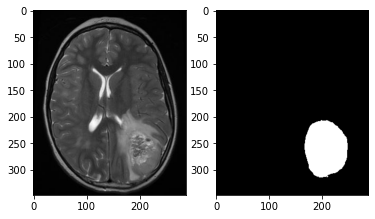

In [19]:
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)

In [55]:
len(image_list) == len(os.listdir('masks'))

True

In [56]:
mask_list = os.listdir('masks')

In [58]:
import csv

In [60]:
with open("train_data.csv",mode="w",newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image","Mask"])
    for image,mask in zip(image_list,mask_list):
        writer.writerow([image,mask])

In [61]:
pd.read_csv('train_data.csv')

,Image,Mask
0,Y1.jpg,mask_Y1.jpg
1,Y10.jpg,mask_Y10.jpg
2,Y100.JPG,mask_Y100.JPG
3,Y101.jpg,mask_Y101.jpg
4,Y102.jpg,mask_Y102.jpg
...,...,...
144,Y92.png,mask_Y92.png
145,Y95.jpg,mask_Y95.jpg
146,Y96.jpg,mask_Y96.jpg
147,Y97.JPG,mask_Y97.JPG
